In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
# from tensorflow_gan.python.losses.losses_impl import wasserstein_generator_loss, wasserstein_discriminator_loss

In [2]:
tf.enable_eager_execution()
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
df = pd.read_csv("data/metadata.csv")

In [4]:
df

,card_file_name,id,link,name,rarity,setname,type
0,data/pictures/Base Set/Alakazam_(Base_Set_1),1/102,https://bulbapedia.bulbagarden.net/wiki/Alakaz...,Alakazam,Rare Holo,Base Set,Psychic
1,data/pictures/Base Set/Blastoise_(Base_Set_2),2/102,https://bulbapedia.bulbagarden.net/wiki/Blasto...,Blastoise,Rare Holo,Base Set,Water
2,data/pictures/Base Set/Chansey_(Base_Set_3),3/102,https://bulbapedia.bulbagarden.net/wiki/Chanse...,Chansey,Rare Holo,Base Set,Colorless
3,data/pictures/Base Set/Charizard_(Base_Set_4),4/102,https://bulbapedia.bulbagarden.net/wiki/Chariz...,Charizard,Rare Holo,Base Set,Fire
4,data/pictures/Base Set/Clefairy_(Base_Set_5),5/102,https://bulbapedia.bulbagarden.net/wiki/Clefai...,Clefairy,Rare Holo,Base Set,Colorless
5,data/pictures/Base Set/Gyarados_(Base_Set_6),6/102,https://bulbapedia.bulbagarden.net/wiki/Gyarad...,Gyarados,Rare Holo,Base Set,Water
6,data/pictures/Base Set/Hitmonchan_(Base_Set_7),7/102,https://bulbapedia.bulbagarden.net/wiki/Hitmon...,Hitmonchan,Rare Holo,Base Set,Fighting
7,data/pictures/Base Set/Machamp_(Base_Set_8),8/102,https://bulbapedia.bulbagarden.net/wiki/Macham...,Machamp,Rare Holo,Base Set,Fighting
8,data/pictures/Base Set/Magneton_(Base_Set_9),9/102,https://bulbapedia.bulbagarden.net/wiki/Magnet...,Magneton,Rare Holo,Base Set,Lightning
9,data/pictures/Base Set/Mewtwo_(Base_Set_10),10/102,https://bulbapedia.bulbagarden.net/wiki/Mewtwo...,Mewtwo,Rare Holo,Base Set,Psychic


# Drop a couple of bad records

In [5]:
df = df[~df["card_file_name"].isin([
    "data/pictures/Mysterious Treasures/Honchkrow_(Mysterious_Treasures_10)",
    "data/pictures/Unified Minds/Umbreon_%26_Darkrai-GX_(Unified_Minds_125)", # missing on website
    "data/pictures/Base Set/Charizard_(Base_Set_4)", # special version of normal website
    "data/pictures/Stormfront/Charizard_(Stormfront_103)", # special version of normal website
])]

import os
df = df[np.array([os.path.exists(f) for f in df["card_file_name"]])]

filter to Pokemon types

In [6]:
# df.type.value_counts()
filter_to_pokemon_types = False
filter_to_simple_rarities = True

if filter_to_pokemon_types:
    df = df[df["type"].isin([
        "Water",
        "Grass",
        "Colorless",
        "Psychic",
        "Fighting",
        "Fire",
        "Lightning",
        "Darkness",
        "Metal",
        "Dragon",
        "Fairy",
    ])]

if filter_to_simple_rarities:
    df = df[df["rarity"].isin([
        "Common",
        "Uncommon",
        "Rare",
        "Rare Holo",
        "Rare Holo ex",
    ])]


# Parameters

In [7]:
n_epochs = 200
n_random_inputs_per_training = 800
n_real_per_training = 4000
batch_size = 100

n_generator_input = 100
n_generator_dense = 200

use_greyscale = False
rescale_dimensions = (32, 64)

columns_as_input = [
    "rarity",
    "type",
#     "setname"
]

assert n_real_per_training % batch_size == 0

# Create dataset

In [8]:
# Function to load and preprocess each image
def parse_image_file(
    filename,
    label = None,
    crop=False,
    to_greyscale=False,
    rescale=None,
):
    img = tf.io.read_file(filename)
    img = tf.cast(tf.image.decode_jpeg(img, channels=3), tf.float32) / 255.0
    
#     if img.shape[0] < 50:
#         print(f"Error with image `{filename}`: shape found was small: {img.shape}")
    img = tf.image.resize_with_crop_or_pad(img, 260, 180)
    
    # Some images have an extra alpha channel. Remove that.
    img = img[:, :, :3]
    
    if crop:
        img = tf.image.crop_to_bounding_box(
            img, 
            offset_height = 35,
            offset_width = 20,
            target_height = 100,
            target_width = 140,
        )
        
    if rescale is not None:
        img = tf.image.resize(img, size=rescale)
        
    if to_greyscale:
        img = tf.image.rgb_to_grayscale(img)
        img = tf.expand_dims(img, -1)
    
    if label is None: return img
    else: return img, label

In [9]:
n_records = df.shape[0]

In [10]:
images = tf.constant(df["card_file_name"].values)
x = tf.stack([parse_image_file(img, crop=True, to_greyscale=use_greyscale, rescale=rescale_dimensions) for img in images], axis=0)
gc.collect()

7

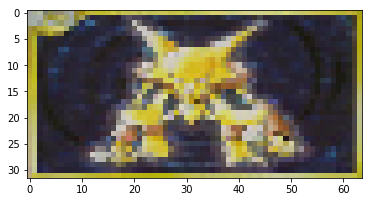

In [11]:
example_input = x[0]
generator_dense_output_size = int(tf.reduce_prod(example_input.shape))
generator_output_size = example_input.shape

plt.imshow(tf.squeeze(x[0]), cmap='gray')

### Make the class dataset

In [12]:
def label_converter(label):
    return tf.math.argmax(label, axis=-1)

def make_conversion_function(classes):
    return lambda idx: convert_column(idx, classes)

def convert_column(idx, classes):
    return tf.gather(classes, idx)
    
def target_columns_to_tf(column_names):
    y = {}
    size_per_class = []
    conversion_functions = {}
    
    for colname in column_names:
        col = df[colname]
        classnames, indices = np.unique(col.values, return_inverse=True)
        classnames = np.append(classnames, "Fake")
        n_classes = len(classnames)
        size_per_class.append(n_classes)
        
        conversion_functions[colname] = make_conversion_function(classnames)
        y[colname] = keras.utils.to_categorical(indices, n_classes)

    return (
        y,
        size_per_class,
        conversion_functions,
    )

In [13]:
y, size_per_class, conversion_functions = target_columns_to_tf(columns_as_input)

def convert_target_matrix_to_label(pred, colname):
    current_start_index = 0
    pred = pred[colname]
    
    label_indices = label_converter(pred)
    return conversion_functions[colname](label_indices)


In [14]:
convert_target_matrix_to_label(y, "type")

<tf.Tensor: id=304666, shape=(8704,), dtype=string, numpy=
array([b'Psychic', b'Water', b'Colorless', ..., b'T', b'T [Su]',
       b'Colorless'], dtype=object)>

# Generator

In [17]:
def make_generator_input(n_records, given_labels: dict = None):
    base_random_input = tf.random.normal((n_records, n_generator_input))
    
    labels = [
        keras.utils.to_categorical(
            tf.convert_to_tensor(
                np.random.randint(size=(n_records, 1), low=0, high=size-1) # -1 to avoid making fake classes
            )
        , size)
        for size in size_per_class
    ]
    
    x_extra = tf.concat(labels, axis=-1)
    
    x = tf.concat([base_random_input, x_extra], axis=-1)
    y = {colname: label for colname, label in zip(columns_as_input, labels)}
    return x, y

assert make_generator_input(10)[0].shape[1] == n_generator_input + sum(size_per_class)

In [18]:
generator_conv_sizes = [6, 3, 1]
generator_init_height = generator_output_size[0].value
generator_init_width = generator_output_size[1].value
generator_init_channels = 50
generator_filters = 100
generator_upsampling = [2, 2, 1]

for sampling, conv_size in zip(reversed(generator_upsampling), reversed(generator_conv_sizes)):
    print(f"{conv_size} --- \twidth: {generator_init_width}\t height: {generator_init_height}")
    generator_init_width = (generator_init_width - (conv_size - 1)) / sampling
    generator_init_height = (generator_init_height - (conv_size - 1)) / sampling
    
print(f"{conv_size} --- \twidth: {generator_init_width}\t height: {generator_init_height}")
assert int(generator_init_width) == generator_init_width and int(generator_init_height) == generator_init_height
generator_init_width = int(generator_init_width)
generator_init_height = int(generator_init_height)

generator_last_dense_layer = generator_init_height * generator_init_channels * generator_init_width

1 --- 	width: 64	 height: 32
3 --- 	width: 64.0	 height: 32.0
6 --- 	width: 31.0	 height: 15.0
6 --- 	width: 13.0	 height: 5.0


In [19]:
generator_input = keras.layers.Input((n_generator_input + sum(size_per_class),))
gen_x = keras.layers.Dropout(.5)(generator_input)
gen_x = keras.layers.Dense(n_generator_dense)(gen_x)
gen_x = keras.layers.LeakyReLU()(gen_x)
gen_x = keras.layers.Dense(n_generator_dense)(gen_x)
gen_x = keras.layers.LeakyReLU()(gen_x)
gen_x = keras.layers.Dense(generator_last_dense_layer)(gen_x)
gen_x = keras.layers.LeakyReLU()(gen_x)
gen_x = keras.layers.Reshape((generator_init_height, generator_init_width, generator_init_channels))(gen_x)


for i, (conv_size, upsampling) in enumerate(zip(generator_conv_sizes, generator_upsampling)):
    if i < len(generator_conv_sizes) - 1:
        act = "relu"
        filters=generator_filters
    else:
        act = "sigmoid"
        filters= 1 if use_greyscale else 3
    
    if upsampling > 1:
        gen_x = keras.layers.UpSampling2D(size=upsampling)(gen_x)
    gen_x = keras.layers.Conv2DTranspose(
        filters=filters, 
        kernel_size=conv_size,
        activation=act,
    )(gen_x)
    
generator = keras.Model(generator_input, gen_x)

In [20]:
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 126)]             0         
_________________________________________________________________
dropout (Dropout)            (None, 126)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               25400     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3250)              653250

In [21]:
assert generator.predict(make_generator_input(1)[0]).shape == tf.expand_dims(example_input, 0).shape

# Minibatch Discrimination

In [221]:
# Failed implementation

# class MinibatchDiscrimination(keras.layers.Layer):
#     def __init__(self, nb_kernels, kernel_dim, init='glorot_uniform', **kwargs):
#         super(MinibatchDiscrimination, self).__init__(**kwargs)
#         self.init = keras.initializers.get(init)
#         self.nb_kernels = int(nb_kernels)
#         self.kernel_dim = int(kernel_dim)

#     def build(self, input_shape):
#         self.kernel = self.add_variable(
#             shape=(self.nb_kernels, int(input_shape[-1]), self.kernel_dim),
#             name=f"{self.name}_W",
#         )
        
#     def good_call(self, input):
#         dotprod = keras.backend.dot(x, self.kernel)
#         activation = keras.backend.reshape(dotprod, (-1, self.nb_kernels, self.kernel_dim))
#         diffs = keras.backend.expand_dims(activation, 3) - keras.backend.expand_dims(keras.backend.permute_dimensions(activation, [1, 2, 0]), 0)
#         abs_diffs = keras.backend.sum(keras.backend.abs(diffs), axis=2)
#         minibatch_features = keras.backend.sum(keras.backend.exp(-abs_diffs), axis=2)
#         return keras.backend.concatenate([x, minibatch_features], 1)

#     def call(self, input):
#         T = tf.einsum('ij,kjl->ikl', input, self.kernel) # input - B - C
        
#         r = tf.reduce_sum(T*T, -1)
#         Tij = 2 * tf.einsum("ijk,ljk->ilj", T, T)
        
#         D = tf.expand_dims(r, axis=1) - Tij + tf.expand_dims(r, axis=0)
        
#         dissimilarities = tf.reduce_sum(tf.math.sqrt(tf.abs(D)), 1)
        
#         res = tf.concat((input, dissimilarities), axis=-1)
        
#         print(res)
#         print(self.good_call(input))
#         print("----\n----\n----\n")
        
#         return res

In [222]:

class MinibatchDiscrimination(keras.layers.Layer):
    """Concatenates to each sample information about how different the input
    features for that sample are from features of other samples in the same
    minibatch, as described in Salimans et. al. (2016). Useful for preventing
    GANs from collapsing to a single output. When using this layer, generated
    samples and reference samples should be in separate batches.
    # Example
    ```python
        # apply a convolution 1d of length 3 to a sequence with 10 timesteps,
        # with 64 output filters
        model = Sequential()
        model.add(Convolution1D(64, 3, border_mode='same', input_shape=(10, 32)))
        # now model.output_shape == (None, 10, 64)
        # flatten the output so it can be fed into a minibatch discrimination layer
        model.add(Flatten())
        # now model.output_shape == (None, 640)
        # add the minibatch discrimination layer
        model.add(MinibatchDiscrimination(5, 3))
        # now model.output_shape = (None, 645)
    ```
    # Arguments
        nb_kernels: Number of discrimination kernels to use
            (dimensionality concatenated to output).
        kernel_dim: The dimensionality of the space where closeness of samples
            is calculated.
        init: name of initialization function for the weights of the layer
            (see [initializations](../initializations.md)),
            or alternatively, Theano function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
        weights: list of numpy arrays to set as initial weights.
        W_regularizer: instance of [WeightRegularizer](../regularizers.md)
            (eg. L1 or L2 regularization), applied to the main weights matrix.
        activity_regularizer: instance of [ActivityRegularizer](../regularizers.md),
            applied to the network output.
        W_constraint: instance of the [constraints](../constraints.md) module
            (eg. maxnorm, nonneg), applied to the main weights matrix.
        input_dim: Number of channels/dimensions in the input.
            Either this argument or the keyword argument `input_shape`must be
            provided when using this layer as the first layer in a model.
    # Input shape
        2D tensor with shape: `(samples, input_dim)`.
    # Output shape
        2D tensor with shape: `(samples, input_dim + nb_kernels)`.
    # References
        - [Improved Techniques for Training GANs](https://arxiv.org/abs/1606.03498)
    """

    def __init__(self, nb_kernels, kernel_dim, init='glorot_uniform', weights=None,
                 W_regularizer=None, activity_regularizer=None,
                 W_constraint=None, input_dim=None, **kwargs):
        self.init = keras.initializers.get(init)
        self.nb_kernels = nb_kernels
        self.kernel_dim = kernel_dim
        self.input_dim = input_dim

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.activity_regularizer = keras.regularizers.get(activity_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)

        self.initial_weights = weights
        self.input_spec = [keras.layers.InputSpec(ndim=2)]

        if self.input_dim:
            kwargs['input_shape'] = (self.input_dim,)
        super(MinibatchDiscrimination, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
#         self.input_spec = [keras.layers.InputSpec(dtype=keras.backend.floatx,
#                                      shape=(None, input_dim))]
        self.W = self.init(
            (self.nb_kernels, input_dim, self.kernel_dim),
#             name='{}_W'.format(self.name)
        )

#         self.trainable_weights = [self.W]

        self.regularizers = []
        if self.W_regularizer:
            self.W_regularizer.set_param(self.W)
            self.regularizers.append(self.W_regularizer)

        if self.activity_regularizer:
            self.activity_regularizer.set_layer(self)
            self.regularizers.append(self.activity_regularizer)

        self.constraints = {}
        if self.W_constraint:
            self.constraints[self.W] = self.W_constraint

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights

    def call(self, x, mask=None):
        activation = keras.backend.reshape(keras.backend.dot(x, self.W), (-1, self.nb_kernels, self.kernel_dim))
        diffs = keras.backend.expand_dims(activation, 3) - keras.backend.expand_dims(keras.backend.permute_dimensions(activation, [1, 2, 0]), 0)
        abs_diffs = keras.backend.sum(keras.backend.abs(diffs), axis=2)
        minibatch_features = keras.backend.sum(keras.backend.exp(-abs_diffs), axis=2)
        return keras.backend.concatenate([x, minibatch_features], 1)

    def get_output_shape_for(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], input_shape[1]+self.nb_kernels

    def get_config(self):
        config = {'nb_kernels': self.nb_kernels,
                  'kernel_dim': self.kernel_dim,
                  'init': self.init.__name__,
                  'W_regularizer': self.W_regularizer.get_config() if self.W_regularizer else None,
                  'activity_regularizer': self.activity_regularizer.get_config() if self.activity_regularizer else None,
                  'W_constraint': self.W_constraint.get_config() if self.W_constraint else None,
                  'input_dim': self.input_dim}
        base_config = super(MinibatchDiscrimination, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [223]:
def test_minibatch():
    n = 12
    nvar = 4
    B = 6
    C = 7
    A = tf.random.normal((n, nvar))
    l = MinibatchDiscrimination(B, C)
    l.build(A.shape)
    assert l.call(A).shape == (n, nvar + B)
    
test_minibatch()

# Discriminator

In [224]:
discr_dense_size = 200
discr_minibatch_features = int(discr_dense_size / 10)
disc_C = 20

inputs = keras.layers.Input(shape=generator_output_size)
x_1 = keras.layers.Dropout(.5, input_shape=generator_output_size)(inputs)
x_1 = keras.layers.Conv2D(filters=60, kernel_size=5, strides=2, input_shape=generator_output_size)(x_1)
x_1 = keras.layers.MaxPool2D()(x_1)
x_1 = keras.layers.Conv2D(filters=20, kernel_size=5, strides=2)(x_1)
x_1 = keras.layers.MaxPool2D()(x_1)
x_1 = keras.layers.Flatten()(x_1)
x_1 = keras.layers.Dense(units=discr_dense_size)(x_1)
x_1 = keras.layers.LeakyReLU()(x_1)

x_1 = MinibatchDiscrimination(discr_minibatch_features, disc_C)(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)

x_1 = keras.layers.Dense(units=discr_dense_size)(x_1)
x_1 = keras.layers.LeakyReLU()(x_1)

x_1 = MinibatchDiscrimination(discr_minibatch_features, disc_C)(x_1)
x_1 = keras.layers.BatchNormalization()(x_1)

    
outputs = {
    colname: keras.layers.Dense(units=size, activation="softmax", name=colname)(x_1) 
    for colname, size in zip(columns_as_input, size_per_class)
}

discriminator = keras.Model(inputs, outputs, name="discriminator")

discriminator.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=.001),
    loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.CategoricalAccuracy()],
)
discriminator.trainable = False

In [225]:
discriminator.summary()

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 32, 64, 3)]  0                                            
__________________________________________________________________________________________________
dropout_24 (Dropout)            (None, 32, 64, 3)    0           input_25[0][0]                   
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 14, 30, 60)   4560        dropout_24[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_46 (MaxPooling2D) (None, 7, 15, 60)    0           conv2d_46[0][0]                  
______________________________________________________________________________________

# Generator training model

In [226]:
generator_trainer = keras.Model(
    generator_input,
    discriminator(generator(generator_input)), 
)

generator_trainer.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 126)]             0         
_________________________________________________________________
model (Model)                (None, 32, 64, 3)         989353    
_________________________________________________________________
discriminator (Model)        {'rarity': (None, 6), 'ty 98486     
Total params: 1,087,839
Trainable params: 989,353
Non-trainable params: 98,486
_________________________________________________________________


In [227]:
def generator_loss(y_true, y_pred):
    return tf.reduce_mean(-tf.math.log(y_pred + 1.0e-6))

In [228]:
generator_trainer.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=.001),
#     loss=generator_loss,
    loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.CategoricalAccuracy()],
)

In [229]:
random_input = make_generator_input(1)[0]
test_predict = generator_trainer.predict(random_input)

for output, expected_size in zip(test_predict, size_per_class):
    assert output.shape[1] == expected_size, f"{output.shape} vs {expected_size}"

# Training

In [230]:
# Intionally swapped tradidtion fake/real labels
def make_fake_label(n_records):
    return {
        colname: keras.utils.to_categorical(tf.ones((n_records, 1)) * (size - 1), size)
        for colname, size in zip(columns_as_input, size_per_class)
    }

def make_real_label(n_records):
    return make_label(n_records, 0.9, 1)

def make_label(n_records, min_, max_):
    return tf.random.uniform(shape=(n_records, 1), minval=min_, maxval=max_)

def concat_y(y_1, y_2):
    return {k: tf.concat((v, y_2[k]), axis=0) for k, v in y_1.items()}

def squeeze_y(Y, idx):
    return {k: tf.squeeze(tf.gather(v, idx)) for k, v in Y.items()}

# Pretrain discriminator

In [231]:
def train_discriminator(
    epochs,
    n_real=n_real_per_training,
    n_fake=n_random_inputs_per_training,
    
):
    with_real = n_real > 0
    with_fake = n_fake > 0 
    
    if with_fake:
        generator_x, generator_y = make_generator_input(n_fake)
        generated_input = generator.predict(generator_x)
        generator_y_fake = make_fake_label(n_fake)

    if with_real:
        if n_real == x.shape[0]:
            real_x = x
            real_y = y
        else:
            real_indices = np.random.randint(size=(n_real, 1), low=0, high=n_records)
            real_x = tf.squeeze(tf.gather(x, real_indices))
            real_y = squeeze_y(y, real_indices)
    
    if with_real and with_fake:
        discriminator_x = tf.concat((real_x, generated_input), axis=0)
        discriminator_y = concat_y(real_y, generator_y_fake)
    elif with_real:
        discriminator_x = real_x
        discriminator_y = real_y
    elif with_fake:
        discriminator_x = generated_input
        discriminator_y = generator_y_fake
        
    discriminator.fit(discriminator_x, discriminator_y, epochs=epochs, shuffle=False, batch_size=batch_size)

In [232]:
try:
    train_discriminator(epochs=30, n_real=x.shape[0], n_fake=0)
finally:
    gc.collect()

Epoch 1/30
8704/8704 [==============================] - 3s 322us/sample - loss: 4.5954 - rarity_loss: 1.7378 - type_loss: 2.8541 - rarity_categorical_accuracy: 0.2970 - type_categorical_accuracy: 0.1864
Epoch 2/30
8704/8704 [==============================] - 1s 142us/sample - loss: 3.9215 - rarity_loss: 1.4610 - type_loss: 2.4587 - rarity_categorical_accuracy: 0.3789 - type_categorical_accuracy: 0.2536
Epoch 3/30
8704/8704 [==============================] - 1s 142us/sample - loss: 3.6681 - rarity_loss: 1.3897 - type_loss: 2.2725 - rarity_categorical_accuracy: 0.3936 - type_categorical_accuracy: 0.2711
Epoch 4/30
8704/8704 [==============================] - 1s 141us/sample - loss: 3.5588 - rarity_loss: 1.3680 - type_loss: 2.1831 - rarity_categorical_accuracy: 0.3994 - type_categorical_accuracy: 0.2878
Epoch 5/30
8704/8704 [==============================] - 1s 141us/sample - loss: 3.4934 - rarity_loss: 1.3518 - type_loss: 2.1350 - rarity_categorical_accuracy: 0.4066 - type_categorical_ac

# Train generator

In [233]:
def plot_images_and_classes(n):
    inputs, y = make_generator_input(n)
    predictions = generator.predict(inputs)
    labels = {k: convert_target_matrix_to_label(y, k) for k in y}
    
    for i in range(n):
        img = predictions[i]        
        plt.imshow(img)
        title = {k: v.numpy()[i] for k, v in labels.items()}
        plt.title(f"{title}")
        plt.show()


In [234]:
def train_generator(
    epochs: int,
    n_fake = n_random_inputs_per_training,
):
    generator_x, generator_y = make_generator_input(n_fake)
    
    # stupid renaming because of keras bullshit.
    make_name = lambda i: "discriminator" if i==0 else f"discriminator_{i}"
    generator_y_gen = {make_name(i): generator_y[col] for i, col in enumerate(columns_as_input)}
    
    generator_trainer.fit(generator_x, generator_y_gen, epochs=epochs, batch_size=batch_size)

0 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 149us/sample - loss: 2.3152 - rarity_loss: 1.1279 - type_loss: 1.1873 - rarity_categorical_accuracy: 0.5600 - type_categorical_accuracy: 0.6427
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.7865 - discriminator_loss: 2.0483 - discriminator_1_loss: 3.7381 - discriminator_categorical_accuracy: 0.3413 - discriminator_1_categorical_accuracy: 0.2700


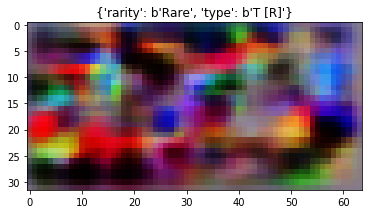

1 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 144us/sample - loss: 2.2246 - rarity_loss: 1.1069 - type_loss: 1.1177 - rarity_categorical_accuracy: 0.5729 - type_categorical_accuracy: 0.6533
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3862 - discriminator_loss: 1.8899 - discriminator_1_loss: 3.4963 - discriminator_categorical_accuracy: 0.3575 - discriminator_1_categorical_accuracy: 0.3325


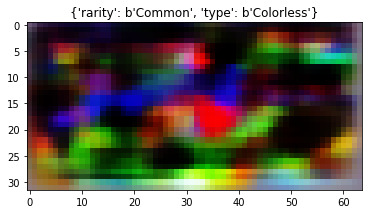

2 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.3101 - rarity_loss: 1.1245 - type_loss: 1.1856 - rarity_categorical_accuracy: 0.5715 - type_categorical_accuracy: 0.6425
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.1642 - discriminator_loss: 1.8850 - discriminator_1_loss: 3.2792 - discriminator_categorical_accuracy: 0.3887 - discriminator_1_categorical_accuracy: 0.3650


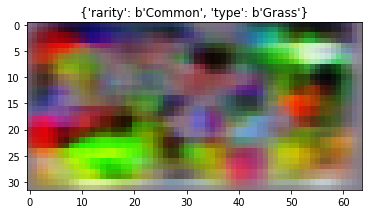

3 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.2535 - rarity_loss: 1.0860 - type_loss: 1.1675 - rarity_categorical_accuracy: 0.5902 - type_categorical_accuracy: 0.6467
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4109 - discriminator_loss: 1.9639 - discriminator_1_loss: 3.4470 - discriminator_categorical_accuracy: 0.4000 - discriminator_1_categorical_accuracy: 0.3088


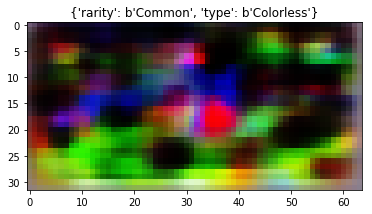

4 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.2377 - rarity_loss: 1.1029 - type_loss: 1.1348 - rarity_categorical_accuracy: 0.5715 - type_categorical_accuracy: 0.6510
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6142 - discriminator_loss: 1.9860 - discriminator_1_loss: 3.6282 - discriminator_categorical_accuracy: 0.3688 - discriminator_1_categorical_accuracy: 0.2850


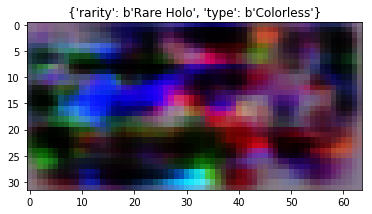

5 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.2395 - rarity_loss: 1.0846 - type_loss: 1.1548 - rarity_categorical_accuracy: 0.5696 - type_categorical_accuracy: 0.6438
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5256 - discriminator_loss: 2.0182 - discriminator_1_loss: 3.5075 - discriminator_categorical_accuracy: 0.3775 - discriminator_1_categorical_accuracy: 0.2663


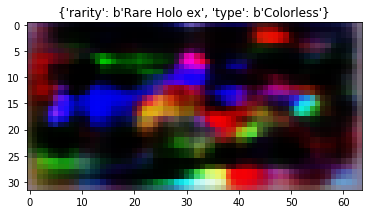

6 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.2076 - rarity_loss: 1.1117 - type_loss: 1.0959 - rarity_categorical_accuracy: 0.5688 - type_categorical_accuracy: 0.6652
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.8071 - discriminator_loss: 2.0436 - discriminator_1_loss: 3.7634 - discriminator_categorical_accuracy: 0.3663 - discriminator_1_categorical_accuracy: 0.2775


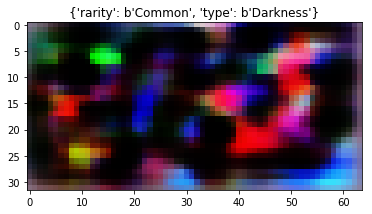

7 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.2607 - rarity_loss: 1.1185 - type_loss: 1.1422 - rarity_categorical_accuracy: 0.5683 - type_categorical_accuracy: 0.6513
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.2936 - discriminator_loss: 2.1025 - discriminator_1_loss: 3.1910 - discriminator_categorical_accuracy: 0.3475 - discriminator_1_categorical_accuracy: 0.3187


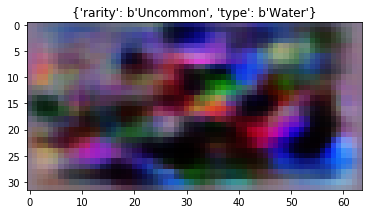

8 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.2490 - rarity_loss: 1.0902 - type_loss: 1.1588 - rarity_categorical_accuracy: 0.5806 - type_categorical_accuracy: 0.6423
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3524 - discriminator_loss: 1.8834 - discriminator_1_loss: 3.4691 - discriminator_categorical_accuracy: 0.4062 - discriminator_1_categorical_accuracy: 0.3237


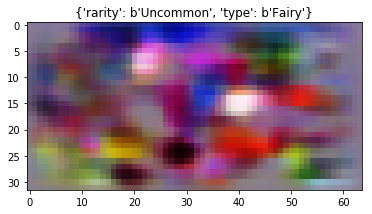

9 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.2313 - rarity_loss: 1.0984 - type_loss: 1.1329 - rarity_categorical_accuracy: 0.5710 - type_categorical_accuracy: 0.6629
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5043 - discriminator_loss: 2.1122 - discriminator_1_loss: 3.3921 - discriminator_categorical_accuracy: 0.3388 - discriminator_1_categorical_accuracy: 0.3350


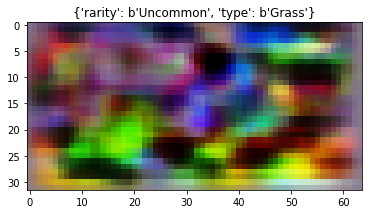

10 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.2447 - rarity_loss: 1.0924 - type_loss: 1.1523 - rarity_categorical_accuracy: 0.5813 - type_categorical_accuracy: 0.6500
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5537 - discriminator_loss: 1.9678 - discriminator_1_loss: 3.5859 - discriminator_categorical_accuracy: 0.3925 - discriminator_1_categorical_accuracy: 0.3425


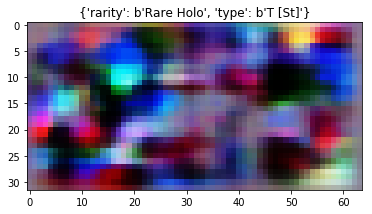

11 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.2273 - rarity_loss: 1.0762 - type_loss: 1.1510 - rarity_categorical_accuracy: 0.5960 - type_categorical_accuracy: 0.6463
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3948 - discriminator_loss: 1.9018 - discriminator_1_loss: 3.4930 - discriminator_categorical_accuracy: 0.4013 - discriminator_1_categorical_accuracy: 0.3338


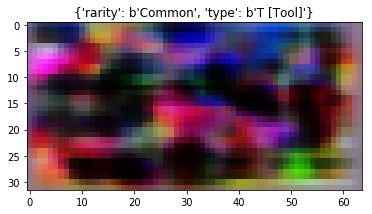

12 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.1738 - rarity_loss: 1.0765 - type_loss: 1.0973 - rarity_categorical_accuracy: 0.5923 - type_categorical_accuracy: 0.6637
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4448 - discriminator_loss: 1.9374 - discriminator_1_loss: 3.5074 - discriminator_categorical_accuracy: 0.3713 - discriminator_1_categorical_accuracy: 0.3425


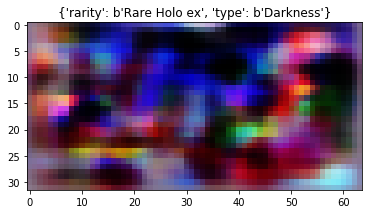

13 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 140us/sample - loss: 2.1989 - rarity_loss: 1.0981 - type_loss: 1.1008 - rarity_categorical_accuracy: 0.5829 - type_categorical_accuracy: 0.6635
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6931 - discriminator_loss: 1.9592 - discriminator_1_loss: 3.7338 - discriminator_categorical_accuracy: 0.3862 - discriminator_1_categorical_accuracy: 0.2862


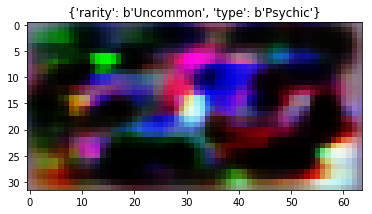

14 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 144us/sample - loss: 2.2204 - rarity_loss: 1.0907 - type_loss: 1.1297 - rarity_categorical_accuracy: 0.5723 - type_categorical_accuracy: 0.6573
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5209 - discriminator_loss: 1.9582 - discriminator_1_loss: 3.5627 - discriminator_categorical_accuracy: 0.3925 - discriminator_1_categorical_accuracy: 0.3288


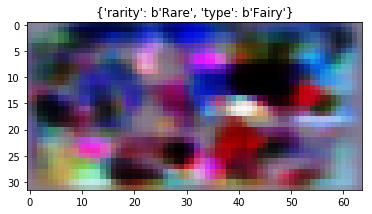

15 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 144us/sample - loss: 2.2057 - rarity_loss: 1.0813 - type_loss: 1.1243 - rarity_categorical_accuracy: 0.5854 - type_categorical_accuracy: 0.6596
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3096 - discriminator_loss: 1.9013 - discriminator_1_loss: 3.4083 - discriminator_categorical_accuracy: 0.4075 - discriminator_1_categorical_accuracy: 0.3325


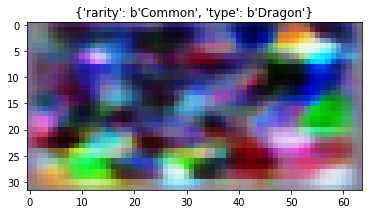

16 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.2308 - rarity_loss: 1.1000 - type_loss: 1.1308 - rarity_categorical_accuracy: 0.5800 - type_categorical_accuracy: 0.6627
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3886 - discriminator_loss: 1.8772 - discriminator_1_loss: 3.5114 - discriminator_categorical_accuracy: 0.4013 - discriminator_1_categorical_accuracy: 0.2875


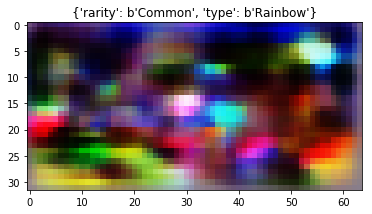

17 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.2213 - rarity_loss: 1.1161 - type_loss: 1.1052 - rarity_categorical_accuracy: 0.5756 - type_categorical_accuracy: 0.6760
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3888 - discriminator_loss: 1.8589 - discriminator_1_loss: 3.5298 - discriminator_categorical_accuracy: 0.4238 - discriminator_1_categorical_accuracy: 0.3338


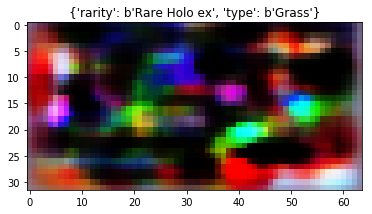

18 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 151us/sample - loss: 2.1600 - rarity_loss: 1.0671 - type_loss: 1.0928 - rarity_categorical_accuracy: 0.5929 - type_categorical_accuracy: 0.6748
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3969 - discriminator_loss: 1.8351 - discriminator_1_loss: 3.5618 - discriminator_categorical_accuracy: 0.4263 - discriminator_1_categorical_accuracy: 0.3450


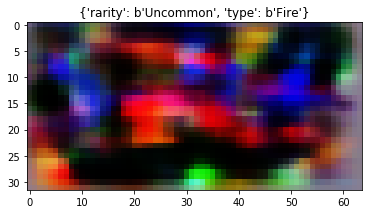

19 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.1584 - rarity_loss: 1.0592 - type_loss: 1.0992 - rarity_categorical_accuracy: 0.6050 - type_categorical_accuracy: 0.6702
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.7632 - discriminator_loss: 1.9098 - discriminator_1_loss: 3.8534 - discriminator_categorical_accuracy: 0.4062 - discriminator_1_categorical_accuracy: 0.2763


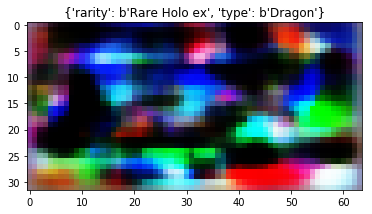

20 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.2028 - rarity_loss: 1.0885 - type_loss: 1.1143 - rarity_categorical_accuracy: 0.5888 - type_categorical_accuracy: 0.6640
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4673 - discriminator_loss: 1.8659 - discriminator_1_loss: 3.6014 - discriminator_categorical_accuracy: 0.4313 - discriminator_1_categorical_accuracy: 0.3050


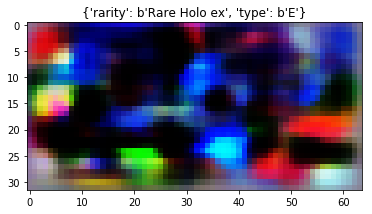

21 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.1611 - rarity_loss: 1.0811 - type_loss: 1.0800 - rarity_categorical_accuracy: 0.5850 - type_categorical_accuracy: 0.6662
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6496 - discriminator_loss: 1.9157 - discriminator_1_loss: 3.7339 - discriminator_categorical_accuracy: 0.3988 - discriminator_1_categorical_accuracy: 0.2950


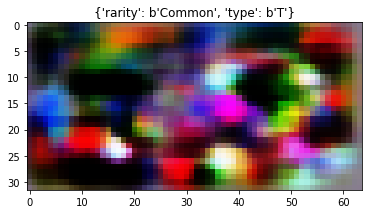

22 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.1215 - rarity_loss: 1.0578 - type_loss: 1.0636 - rarity_categorical_accuracy: 0.6021 - type_categorical_accuracy: 0.6890
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6524 - discriminator_loss: 1.8168 - discriminator_1_loss: 3.8357 - discriminator_categorical_accuracy: 0.3988 - discriminator_1_categorical_accuracy: 0.2837


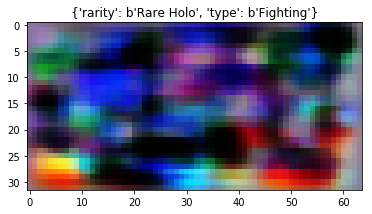

23 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.1475 - rarity_loss: 1.0789 - type_loss: 1.0686 - rarity_categorical_accuracy: 0.5994 - type_categorical_accuracy: 0.6765
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.2256 - discriminator_loss: 1.9375 - discriminator_1_loss: 3.2881 - discriminator_categorical_accuracy: 0.4175 - discriminator_1_categorical_accuracy: 0.3638


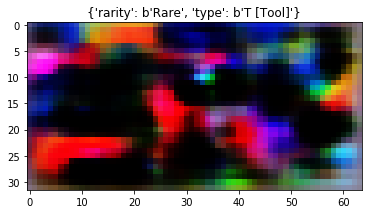

24 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.2042 - rarity_loss: 1.0917 - type_loss: 1.1125 - rarity_categorical_accuracy: 0.5819 - type_categorical_accuracy: 0.6612
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4458 - discriminator_loss: 1.8014 - discriminator_1_loss: 3.6444 - discriminator_categorical_accuracy: 0.4162 - discriminator_1_categorical_accuracy: 0.2812


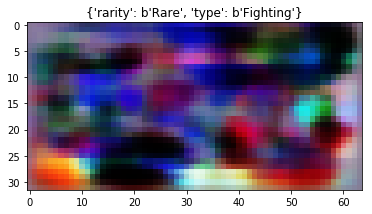

25 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0841 - rarity_loss: 1.0319 - type_loss: 1.0522 - rarity_categorical_accuracy: 0.6077 - type_categorical_accuracy: 0.6860
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4414 - discriminator_loss: 1.9012 - discriminator_1_loss: 3.5402 - discriminator_categorical_accuracy: 0.4150 - discriminator_1_categorical_accuracy: 0.3688


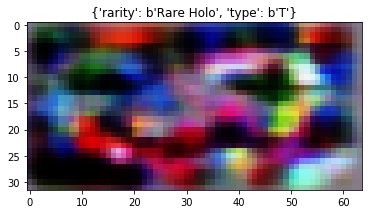

26 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 144us/sample - loss: 2.1076 - rarity_loss: 1.0719 - type_loss: 1.0357 - rarity_categorical_accuracy: 0.6062 - type_categorical_accuracy: 0.6881
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5246 - discriminator_loss: 1.9350 - discriminator_1_loss: 3.5896 - discriminator_categorical_accuracy: 0.4150 - discriminator_1_categorical_accuracy: 0.3137


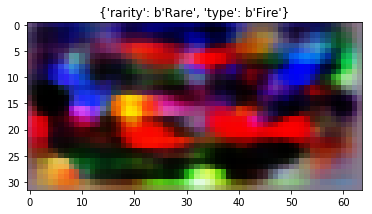

27 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.0899 - rarity_loss: 1.0448 - type_loss: 1.0451 - rarity_categorical_accuracy: 0.6031 - type_categorical_accuracy: 0.6973
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3588 - discriminator_loss: 1.9262 - discriminator_1_loss: 3.4326 - discriminator_categorical_accuracy: 0.3700 - discriminator_1_categorical_accuracy: 0.3587


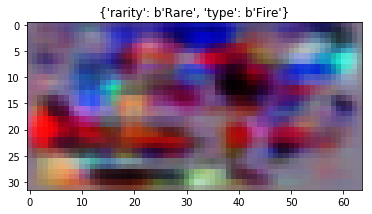

28 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.1013 - rarity_loss: 1.0361 - type_loss: 1.0652 - rarity_categorical_accuracy: 0.6079 - type_categorical_accuracy: 0.6865
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5878 - discriminator_loss: 2.0125 - discriminator_1_loss: 3.5753 - discriminator_categorical_accuracy: 0.3537 - discriminator_1_categorical_accuracy: 0.3613


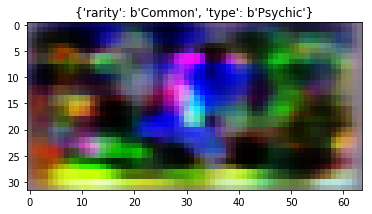

29 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 144us/sample - loss: 2.0922 - rarity_loss: 1.0476 - type_loss: 1.0445 - rarity_categorical_accuracy: 0.6025 - type_categorical_accuracy: 0.6860
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5445 - discriminator_loss: 2.0771 - discriminator_1_loss: 3.4674 - discriminator_categorical_accuracy: 0.3837 - discriminator_1_categorical_accuracy: 0.3137


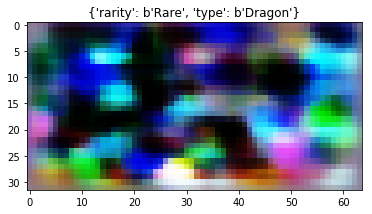

30 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0987 - rarity_loss: 1.0440 - type_loss: 1.0547 - rarity_categorical_accuracy: 0.6044 - type_categorical_accuracy: 0.6881
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6717 - discriminator_loss: 1.9560 - discriminator_1_loss: 3.7157 - discriminator_categorical_accuracy: 0.3887 - discriminator_1_categorical_accuracy: 0.3262


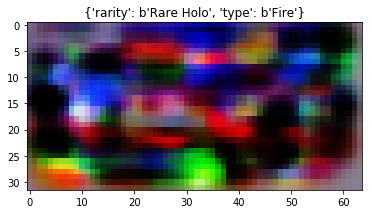

31 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.0581 - rarity_loss: 1.0303 - type_loss: 1.0278 - rarity_categorical_accuracy: 0.6200 - type_categorical_accuracy: 0.6944
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.1955 - discriminator_loss: 1.8680 - discriminator_1_loss: 3.3275 - discriminator_categorical_accuracy: 0.4187 - discriminator_1_categorical_accuracy: 0.3462


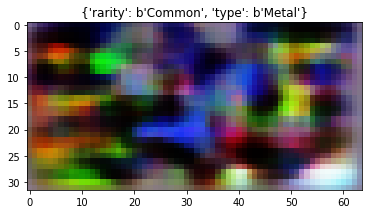

32 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0120 - rarity_loss: 0.9990 - type_loss: 1.0130 - rarity_categorical_accuracy: 0.6277 - type_categorical_accuracy: 0.6969
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.2895 - discriminator_loss: 2.0263 - discriminator_1_loss: 3.2632 - discriminator_categorical_accuracy: 0.3738 - discriminator_1_categorical_accuracy: 0.3525


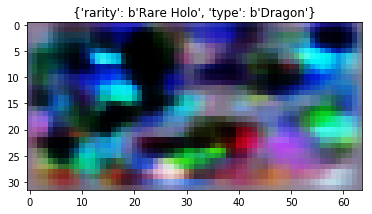

33 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0797 - rarity_loss: 1.0443 - type_loss: 1.0355 - rarity_categorical_accuracy: 0.6085 - type_categorical_accuracy: 0.6871
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3894 - discriminator_loss: 1.9552 - discriminator_1_loss: 3.4342 - discriminator_categorical_accuracy: 0.3713 - discriminator_1_categorical_accuracy: 0.3338


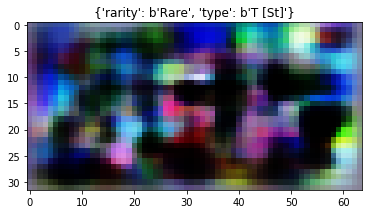

34 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0468 - rarity_loss: 1.0294 - type_loss: 1.0174 - rarity_categorical_accuracy: 0.6158 - type_categorical_accuracy: 0.6925
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.7171 - discriminator_loss: 2.1037 - discriminator_1_loss: 3.6134 - discriminator_categorical_accuracy: 0.3787 - discriminator_1_categorical_accuracy: 0.3375


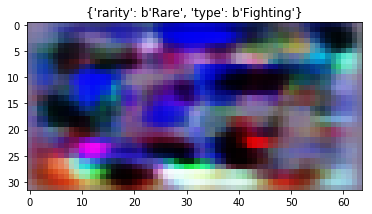

35 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0790 - rarity_loss: 1.0304 - type_loss: 1.0486 - rarity_categorical_accuracy: 0.6179 - type_categorical_accuracy: 0.6879
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6704 - discriminator_loss: 1.9108 - discriminator_1_loss: 3.7596 - discriminator_categorical_accuracy: 0.3725 - discriminator_1_categorical_accuracy: 0.3125


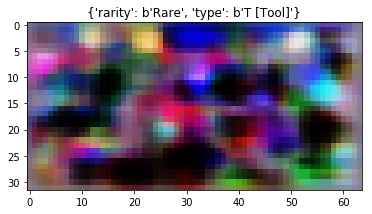

36 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.0448 - rarity_loss: 1.0302 - type_loss: 1.0146 - rarity_categorical_accuracy: 0.6115 - type_categorical_accuracy: 0.6958
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4043 - discriminator_loss: 1.8866 - discriminator_1_loss: 3.5177 - discriminator_categorical_accuracy: 0.4187 - discriminator_1_categorical_accuracy: 0.3388


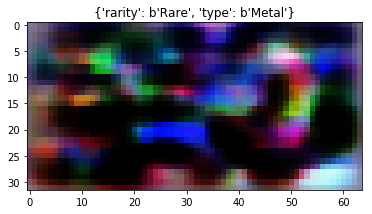

37 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.0898 - rarity_loss: 1.0326 - type_loss: 1.0572 - rarity_categorical_accuracy: 0.6142 - type_categorical_accuracy: 0.6908
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.7190 - discriminator_loss: 1.9887 - discriminator_1_loss: 3.7304 - discriminator_categorical_accuracy: 0.3850 - discriminator_1_categorical_accuracy: 0.3225


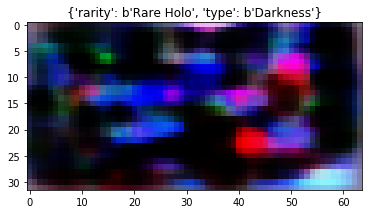

38 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.0592 - rarity_loss: 1.0257 - type_loss: 1.0335 - rarity_categorical_accuracy: 0.6208 - type_categorical_accuracy: 0.6965
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4446 - discriminator_loss: 1.8438 - discriminator_1_loss: 3.6009 - discriminator_categorical_accuracy: 0.4087 - discriminator_1_categorical_accuracy: 0.3325


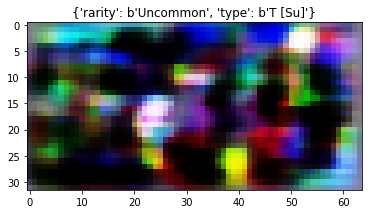

39 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.0722 - rarity_loss: 1.0213 - type_loss: 1.0509 - rarity_categorical_accuracy: 0.6265 - type_categorical_accuracy: 0.6842
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6620 - discriminator_loss: 1.9382 - discriminator_1_loss: 3.7238 - discriminator_categorical_accuracy: 0.3963 - discriminator_1_categorical_accuracy: 0.3237


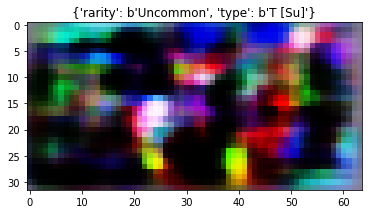

40 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 144us/sample - loss: 2.0355 - rarity_loss: 1.0169 - type_loss: 1.0186 - rarity_categorical_accuracy: 0.6237 - type_categorical_accuracy: 0.6942
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3658 - discriminator_loss: 1.8426 - discriminator_1_loss: 3.5233 - discriminator_categorical_accuracy: 0.4300 - discriminator_1_categorical_accuracy: 0.3275


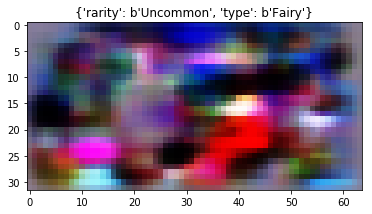

41 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.0573 - rarity_loss: 1.0141 - type_loss: 1.0432 - rarity_categorical_accuracy: 0.6240 - type_categorical_accuracy: 0.6867
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.2952 - discriminator_loss: 2.0619 - discriminator_1_loss: 3.2333 - discriminator_categorical_accuracy: 0.3713 - discriminator_1_categorical_accuracy: 0.3713


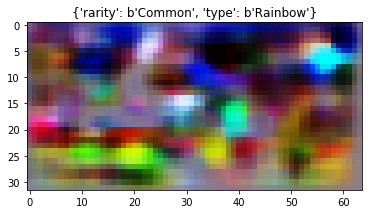

42 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.0449 - rarity_loss: 1.0423 - type_loss: 1.0026 - rarity_categorical_accuracy: 0.6042 - type_categorical_accuracy: 0.7027
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4948 - discriminator_loss: 1.9853 - discriminator_1_loss: 3.5095 - discriminator_categorical_accuracy: 0.4050 - discriminator_1_categorical_accuracy: 0.3475


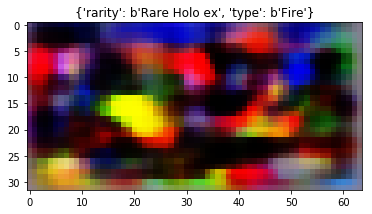

43 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 140us/sample - loss: 2.0625 - rarity_loss: 1.0142 - type_loss: 1.0483 - rarity_categorical_accuracy: 0.6221 - type_categorical_accuracy: 0.6913
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6313 - discriminator_loss: 1.9896 - discriminator_1_loss: 3.6417 - discriminator_categorical_accuracy: 0.4200 - discriminator_1_categorical_accuracy: 0.3638


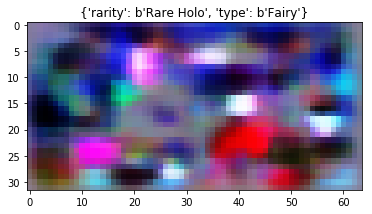

44 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.0123 - rarity_loss: 1.0007 - type_loss: 1.0117 - rarity_categorical_accuracy: 0.6256 - type_categorical_accuracy: 0.6925
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3291 - discriminator_loss: 1.8297 - discriminator_1_loss: 3.4995 - discriminator_categorical_accuracy: 0.4325 - discriminator_1_categorical_accuracy: 0.3700


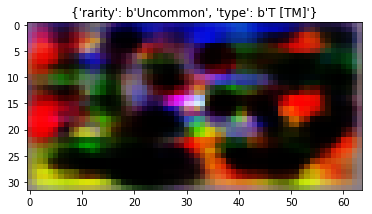

45 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.0237 - rarity_loss: 1.0077 - type_loss: 1.0160 - rarity_categorical_accuracy: 0.6273 - type_categorical_accuracy: 0.6946
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.7960 - discriminator_loss: 2.0153 - discriminator_1_loss: 3.7807 - discriminator_categorical_accuracy: 0.4175 - discriminator_1_categorical_accuracy: 0.3187


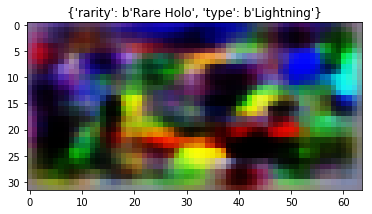

46 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0465 - rarity_loss: 1.0200 - type_loss: 1.0265 - rarity_categorical_accuracy: 0.6306 - type_categorical_accuracy: 0.6846
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.1695 - discriminator_loss: 1.9507 - discriminator_1_loss: 3.2189 - discriminator_categorical_accuracy: 0.3762 - discriminator_1_categorical_accuracy: 0.3862


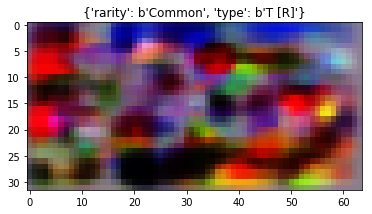

47 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.0343 - rarity_loss: 1.0336 - type_loss: 1.0007 - rarity_categorical_accuracy: 0.6154 - type_categorical_accuracy: 0.6985
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3371 - discriminator_loss: 1.8276 - discriminator_1_loss: 3.5094 - discriminator_categorical_accuracy: 0.4450 - discriminator_1_categorical_accuracy: 0.3850


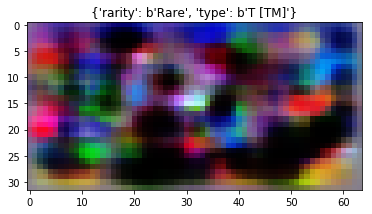

48 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 1.9760 - rarity_loss: 0.9990 - type_loss: 0.9770 - rarity_categorical_accuracy: 0.6363 - type_categorical_accuracy: 0.7040
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4050 - discriminator_loss: 1.8698 - discriminator_1_loss: 3.5352 - discriminator_categorical_accuracy: 0.4000 - discriminator_1_categorical_accuracy: 0.3688


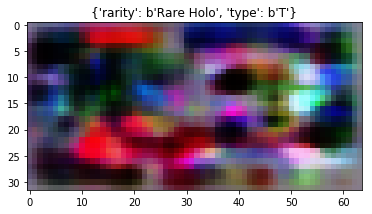

49 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 2.0478 - rarity_loss: 1.0172 - type_loss: 1.0307 - rarity_categorical_accuracy: 0.6183 - type_categorical_accuracy: 0.6873
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6963 - discriminator_loss: 1.9948 - discriminator_1_loss: 3.7015 - discriminator_categorical_accuracy: 0.3762 - discriminator_1_categorical_accuracy: 0.3587


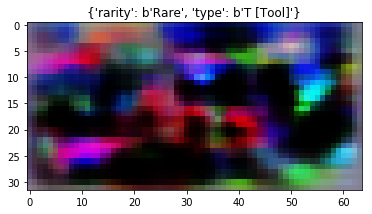

50 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 1.9913 - rarity_loss: 0.9946 - type_loss: 0.9967 - rarity_categorical_accuracy: 0.6344 - type_categorical_accuracy: 0.6992
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4636 - discriminator_loss: 2.0190 - discriminator_1_loss: 3.4445 - discriminator_categorical_accuracy: 0.4150 - discriminator_1_categorical_accuracy: 0.3400


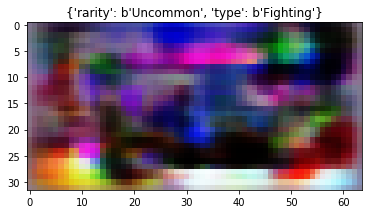

51 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 140us/sample - loss: 1.9879 - rarity_loss: 0.9913 - type_loss: 0.9965 - rarity_categorical_accuracy: 0.6373 - type_categorical_accuracy: 0.7033
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5601 - discriminator_loss: 1.9008 - discriminator_1_loss: 3.6593 - discriminator_categorical_accuracy: 0.4187 - discriminator_1_categorical_accuracy: 0.3388


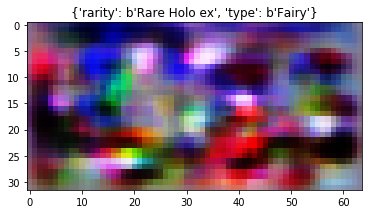

52 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 1.9707 - rarity_loss: 0.9775 - type_loss: 0.9931 - rarity_categorical_accuracy: 0.6454 - type_categorical_accuracy: 0.7040
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6804 - discriminator_loss: 1.8621 - discriminator_1_loss: 3.8182 - discriminator_categorical_accuracy: 0.4263 - discriminator_1_categorical_accuracy: 0.3375


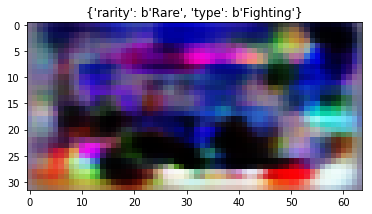

53 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0037 - rarity_loss: 0.9982 - type_loss: 1.0054 - rarity_categorical_accuracy: 0.6273 - type_categorical_accuracy: 0.7050
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3417 - discriminator_loss: 1.9029 - discriminator_1_loss: 3.4388 - discriminator_categorical_accuracy: 0.4212 - discriminator_1_categorical_accuracy: 0.3725


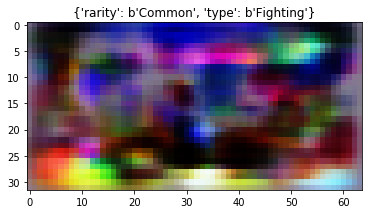

54 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 2.0351 - rarity_loss: 1.0406 - type_loss: 0.9945 - rarity_categorical_accuracy: 0.6096 - type_categorical_accuracy: 0.6963
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6418 - discriminator_loss: 2.0116 - discriminator_1_loss: 3.6303 - discriminator_categorical_accuracy: 0.4162 - discriminator_1_categorical_accuracy: 0.3613


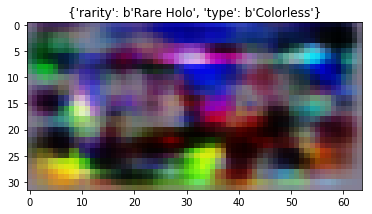

55 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 2.0101 - rarity_loss: 0.9988 - type_loss: 1.0113 - rarity_categorical_accuracy: 0.6329 - type_categorical_accuracy: 0.6915
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4623 - discriminator_loss: 1.8666 - discriminator_1_loss: 3.5957 - discriminator_categorical_accuracy: 0.3988 - discriminator_1_categorical_accuracy: 0.3512


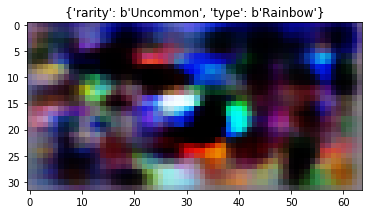

56 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 1.9999 - rarity_loss: 1.0091 - type_loss: 0.9908 - rarity_categorical_accuracy: 0.6233 - type_categorical_accuracy: 0.7044
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3790 - discriminator_loss: 1.8645 - discriminator_1_loss: 3.5145 - discriminator_categorical_accuracy: 0.4238 - discriminator_1_categorical_accuracy: 0.3925


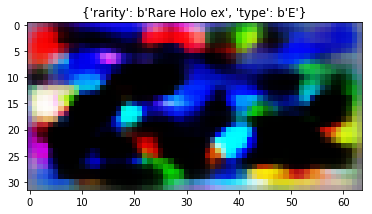

57 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 1.9874 - rarity_loss: 1.0074 - type_loss: 0.9800 - rarity_categorical_accuracy: 0.6240 - type_categorical_accuracy: 0.7110
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4995 - discriminator_loss: 1.9608 - discriminator_1_loss: 3.5386 - discriminator_categorical_accuracy: 0.4087 - discriminator_1_categorical_accuracy: 0.3775


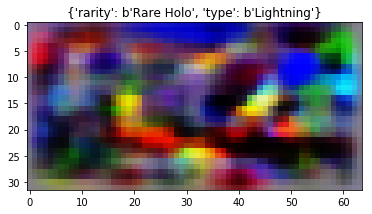

58 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 144us/sample - loss: 2.0009 - rarity_loss: 0.9927 - type_loss: 1.0081 - rarity_categorical_accuracy: 0.6306 - type_categorical_accuracy: 0.6958
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4338 - discriminator_loss: 1.8711 - discriminator_1_loss: 3.5627 - discriminator_categorical_accuracy: 0.4588 - discriminator_1_categorical_accuracy: 0.3825


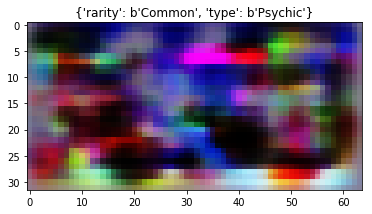

59 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 1.9382 - rarity_loss: 0.9756 - type_loss: 0.9626 - rarity_categorical_accuracy: 0.6429 - type_categorical_accuracy: 0.7181
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.2184 - discriminator_loss: 1.8864 - discriminator_1_loss: 3.3320 - discriminator_categorical_accuracy: 0.4250 - discriminator_1_categorical_accuracy: 0.4162


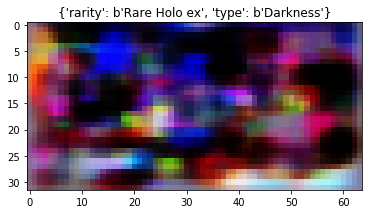

60 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 1.9231 - rarity_loss: 0.9776 - type_loss: 0.9455 - rarity_categorical_accuracy: 0.6406 - type_categorical_accuracy: 0.7121
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5915 - discriminator_loss: 1.9618 - discriminator_1_loss: 3.6297 - discriminator_categorical_accuracy: 0.4325 - discriminator_1_categorical_accuracy: 0.3550


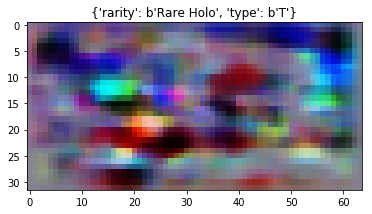

61 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 144us/sample - loss: 1.9920 - rarity_loss: 0.9907 - type_loss: 1.0013 - rarity_categorical_accuracy: 0.6356 - type_categorical_accuracy: 0.7065
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5030 - discriminator_loss: 1.8782 - discriminator_1_loss: 3.6248 - discriminator_categorical_accuracy: 0.4125 - discriminator_1_categorical_accuracy: 0.3537


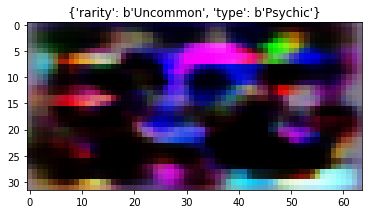

62 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 1.9282 - rarity_loss: 0.9758 - type_loss: 0.9523 - rarity_categorical_accuracy: 0.6396 - type_categorical_accuracy: 0.7169
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.4572 - discriminator_loss: 1.8237 - discriminator_1_loss: 3.6335 - discriminator_categorical_accuracy: 0.4238 - discriminator_1_categorical_accuracy: 0.3850


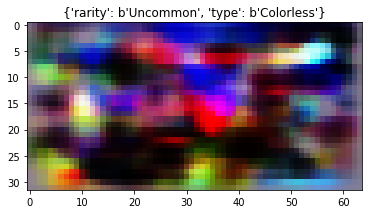

63 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 143us/sample - loss: 1.9234 - rarity_loss: 0.9771 - type_loss: 0.9463 - rarity_categorical_accuracy: 0.6404 - type_categorical_accuracy: 0.7202
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6036 - discriminator_loss: 1.8904 - discriminator_1_loss: 3.7133 - discriminator_categorical_accuracy: 0.4387 - discriminator_1_categorical_accuracy: 0.3262


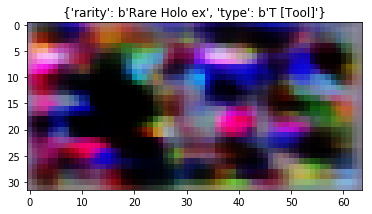

64 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 1.9259 - rarity_loss: 0.9708 - type_loss: 0.9552 - rarity_categorical_accuracy: 0.6446 - type_categorical_accuracy: 0.7208
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6102 - discriminator_loss: 1.8798 - discriminator_1_loss: 3.7304 - discriminator_categorical_accuracy: 0.4025 - discriminator_1_categorical_accuracy: 0.3050


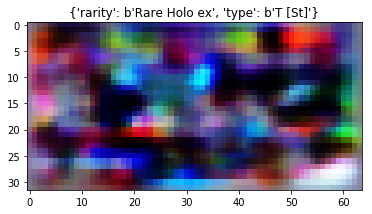

65 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 1.9297 - rarity_loss: 0.9650 - type_loss: 0.9648 - rarity_categorical_accuracy: 0.6521 - type_categorical_accuracy: 0.7206
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6334 - discriminator_loss: 2.0073 - discriminator_1_loss: 3.6261 - discriminator_categorical_accuracy: 0.4050 - discriminator_1_categorical_accuracy: 0.3750


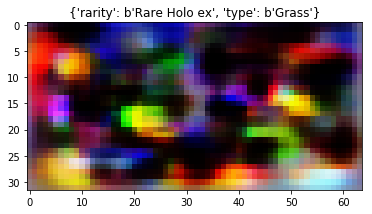

66 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 1.9535 - rarity_loss: 0.9693 - type_loss: 0.9842 - rarity_categorical_accuracy: 0.6490 - type_categorical_accuracy: 0.7131
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.5501 - discriminator_loss: 1.9609 - discriminator_1_loss: 3.5892 - discriminator_categorical_accuracy: 0.4112 - discriminator_1_categorical_accuracy: 0.3625


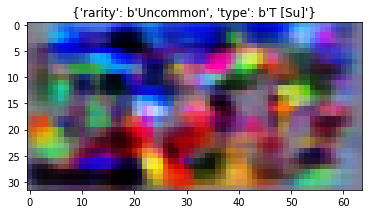

67 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 1.9629 - rarity_loss: 1.0067 - type_loss: 0.9563 - rarity_categorical_accuracy: 0.6435 - type_categorical_accuracy: 0.7215
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.6413 - discriminator_loss: 1.9887 - discriminator_1_loss: 3.6526 - discriminator_categorical_accuracy: 0.4187 - discriminator_1_categorical_accuracy: 0.3288


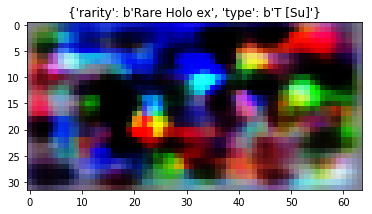

68 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 1.9530 - rarity_loss: 0.9864 - type_loss: 0.9666 - rarity_categorical_accuracy: 0.6454 - type_categorical_accuracy: 0.7165
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3901 - discriminator_loss: 1.8216 - discriminator_1_loss: 3.5685 - discriminator_categorical_accuracy: 0.4387 - discriminator_1_categorical_accuracy: 0.3738


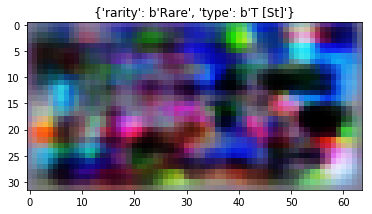

69 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 142us/sample - loss: 1.9685 - rarity_loss: 0.9766 - type_loss: 0.9918 - rarity_categorical_accuracy: 0.6381 - type_categorical_accuracy: 0.7013
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3679 - discriminator_loss: 1.6555 - discriminator_1_loss: 3.7124 - discriminator_categorical_accuracy: 0.4575 - discriminator_1_categorical_accuracy: 0.3625


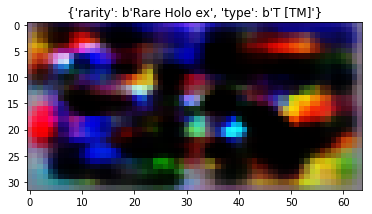

70 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 141us/sample - loss: 1.9407 - rarity_loss: 1.0049 - type_loss: 0.9357 - rarity_categorical_accuracy: 0.6279 - type_categorical_accuracy: 0.7221
Epoch 2/2
800/800 [==============================] - 1s 1ms/sample - loss: 5.3950 - discriminator_loss: 1.9265 - discriminator_1_loss: 3.4685 - discriminator_categorical_accuracy: 0.4000 - discriminator_1_categorical_accuracy: 0.3850


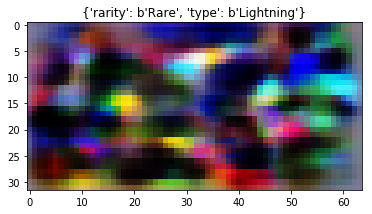

71 / 200
Epoch 1/2
4800/4800 [==============================] - 1s 139us/sample - loss: 1.9143 - rarity_loss: 0.9679 - type_loss: 0.9465 - rarity_categorical_accuracy: 0.6429 - type_categorical_accuracy: 0.7171
Epoch 2/2
1700/4800 [=========>....................] - ETA: 0s - loss: 1.6674 - rarity_loss: 0.7945 - type_loss: 0.8729 - rarity_categorical_accuracy: 0.7324 - type_categorical_accuracy: 0.7182

KeyboardInterrupt: 

In [237]:
gc.collect()
try:
    for i in range(n_epochs):
        print(f"{i} / {n_epochs}")

        # discriminator
        train_discriminator(2, n_fake=n_random_inputs_per_training, n_real=n_real_per_training)
        gc.collect()
        
        # generator
        train_generator(1, n_fake=n_random_inputs_per_training)
        gc.collect()
        
        plot_images_and_classes(1)
finally:
    gc.collect()

In [ ]:
gc.collect()

# Test a couple of records

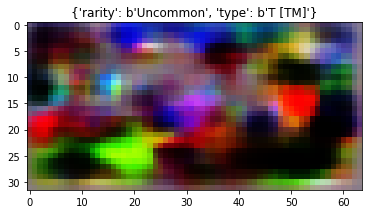

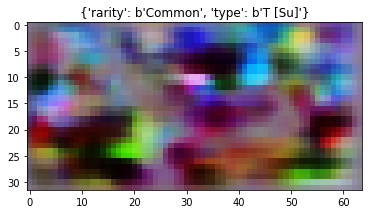

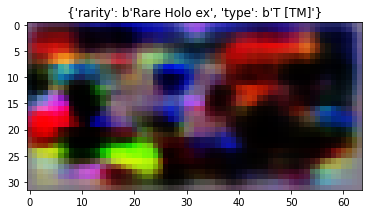

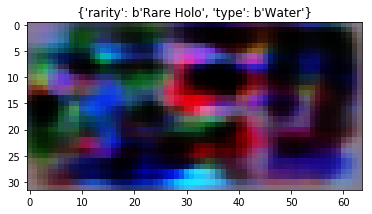

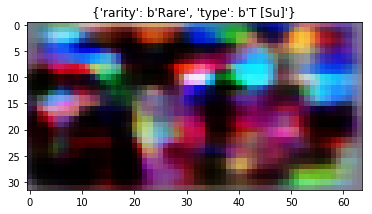

In [236]:
plot_images_and_classes(5)

In [62]:
try:
    train_generator(10, 2000)
finally:
    gc.collect()

Epoch 1/10
2000/2000 [==============================] - 2s 884us/sample - loss: 4.7666 - discriminator_loss: 1.7731 - discriminator_1_loss: 2.9935 - discriminator_categorical_accuracy: 0.1945 - discriminator_1_categorical_accuracy: 0.0575
Epoch 2/10
2000/2000 [==============================] - 1s 425us/sample - loss: 4.7134 - discriminator_loss: 1.7255 - discriminator_1_loss: 2.9880 - discriminator_categorical_accuracy: 0.2145 - discriminator_1_categorical_accuracy: 0.0510
Epoch 3/10
2000/2000 [==============================] - 1s 423us/sample - loss: 4.6885 - discriminator_loss: 1.7051 - discriminator_1_loss: 2.9835 - discriminator_categorical_accuracy: 0.2320 - discriminator_1_categorical_accuracy: 0.0625
Epoch 4/10
2000/2000 [==============================] - 1s 425us/sample - loss: 4.6509 - discriminator_loss: 1.6718 - discriminator_1_loss: 2.9791 - discriminator_categorical_accuracy: 0.3020 - discriminator_1_categorical_accuracy: 0.0525
Epoch 5/10
2000/2000 [======================